## REDDIT ANALYSIS USING NGRAMS

In [2]:
##Importing libraries
import pandas as pd
import ast
import string
from cleantext import clean
import re

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [3]:
##Reading csv
df = pd.read_csv('formula1_recent_comments.csv', index_col = 0)

In [4]:
df.head()

,comments
0,[]
1,['Translated by DeepL\n\nThe FIA is going to e...
2,"['“So, What’s the dress code”? \n“Business Rac..."
3,"[""Zhou's shorts are stylish"", '[Instagram stor..."
4,"['I think Max is wearing his GF’s glasses', '6..."


In [5]:
#3Removing null values and converting it into list
list_of_strings = [y for x in df['comments'].dropna() for y in ast.literal_eval(x)]
list_of_strings

['Translated by DeepL\n\nThe FIA is going to enforce more strictly the rule that drivers are not allowed to wear jewelry and wear their own non-fireproof clothing. Indeed, it will become part of the technical inspection of the car.\n\nIt was before the Australian Grand Prix that the driver notes, prepared by the race director, highlighted some already existing rules. Drivers were not allowed to wear jewelry, nor were they allowed to wear their own clothing that was not homologated by the FIA. Lewis Hamilton, among others, took umbrage and indicated that he would in fact be wearing more, while Mercedes team principal Toto Wolff was surprised by the new race directors\' focus points: "Is this the battle they want to take on Hamilton now? Well, if this is the worst, we\'re not complaining."\n\nTeams now actually risk a penalty\n\nThat mention of rules that have been in place for a long time had to be read as a warning at the time, as it now appears. Now, in fact, the FIA is going a step f

In [6]:
##Removing hyperlinks
remove_hyperlinks=[]
for text in list_of_strings:
    x=re.sub('http://\S+|https://\S+', '', text)
    remove_hyperlinks.append(x)

In [7]:
##Converting list to string
string_clean = ' '.join(remove_hyperlinks)
string_clean

'Translated by DeepL\n\nThe FIA is going to enforce more strictly the rule that drivers are not allowed to wear jewelry and wear their own non-fireproof clothing. Indeed, it will become part of the technical inspection of the car.\n\nIt was before the Australian Grand Prix that the driver notes, prepared by the race director, highlighted some already existing rules. Drivers were not allowed to wear jewelry, nor were they allowed to wear their own clothing that was not homologated by the FIA. Lewis Hamilton, among others, took umbrage and indicated that he would in fact be wearing more, while Mercedes team principal Toto Wolff was surprised by the new race directors\' focus points: "Is this the battle they want to take on Hamilton now? Well, if this is the worst, we\'re not complaining."\n\nTeams now actually risk a penalty\n\nThat mention of rules that have been in place for a long time had to be read as a warning at the time, as it now appears. Now, in fact, the FIA is going a step fu

In [8]:
##Removing the new line and tab values
string_clean = string_clean.replace('\n'," ")
string_clean = string_clean.replace('\t'," ")

In [9]:
#3Remove punctuation
new_string = string_clean.translate(str.maketrans('', '', string.punctuation))

In [10]:
new_string

'Translated by DeepL  The FIA is going to enforce more strictly the rule that drivers are not allowed to wear jewelry and wear their own nonfireproof clothing Indeed it will become part of the technical inspection of the car  It was before the Australian Grand Prix that the driver notes prepared by the race director highlighted some already existing rules Drivers were not allowed to wear jewelry nor were they allowed to wear their own clothing that was not homologated by the FIA Lewis Hamilton among others took umbrage and indicated that he would in fact be wearing more while Mercedes team principal Toto Wolff was surprised by the new race directors focus points Is this the battle they want to take on Hamilton now Well if this is the worst were not complaining  Teams now actually risk a penalty  That mention of rules that have been in place for a long time had to be read as a warning at the time as it now appears Now in fact the FIA is going a step further Before the start of each week

In [11]:
##Installing library contractions
!pip install contractions -q

In [12]:
##Importing library
import contractions

In [13]:
##Converting contractions to full words
expanded_words = []   
for word in new_string.split():
    expanded_words.append(contractions.fix(word))  

expanded_text = ' '.join(expanded_words)

In [14]:
expanded_text

'Translated by DeepL The FIA is going to enforce more strictly the rule that drivers are not allowed to wear jewelry and wear their own nonfireproof clothing Indeed it will become part of the technical inspection of the car It was before the Australian Grand Prix that the driver notes prepared by the race director highlighted some already existing rules Drivers were not allowed to wear jewelry nor were they allowed to wear their own clothing that was not homologated by the FIA Lewis Hamilton among others took umbrage and indicated that he would in fact be wearing more while Mercedes team principal Toto Wolff was surprised by the new race directors focus points Is this the battle they want to take on Hamilton now Well if this is the worst were not complaining Teams now actually risk a penalty That mention of rules that have been in place for a long time had to be read as a warning at the time as it now appears Now in fact the FIA is going a step further Before the start of each weekend 

In [15]:
##Installing yake model
!pip install git+https://github.com/LIAAD/yake

  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake 'C:\Users\bhagy\AppData\Local\Temp\pip-req-build-qtqa0tk0'



  Cloning https://github.com/LIAAD/yake to c:\users\bhagy\appdata\local\temp\pip-req-build-qtqa0tk0
  Resolved https://github.com/LIAAD/yake to commit 238ae58c5ba39326a96862ee0e9cb817e5958440
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [16]:
list_expanded_text=expanded_text.split(',')

In [17]:
##Remove emojis
list_no_emojis=[]
for text in list_expanded_text:
    no_emoji=clean(text, no_emoji=True)
    list_no_emojis.append(no_emoji)

In [18]:
list_no_emojis

['translated by deepl the fia is going to enforce more strictly the rule that drivers are not allowed to wear jewelry and wear their own nonfireproof clothing indeed it will become part of the technical inspection of the car it was before the australian grand prix that the driver notes prepared by the race director highlighted some already existing rules drivers were not allowed to wear jewelry nor were they allowed to wear their own clothing that was not homologated by the fia lewis hamilton among others took umbrage and indicated that he would in fact be wearing more while mercedes team principal toto wolff was surprised by the new race directors focus points is this the battle they want to take on hamilton now well if this is the worst were not complaining teams now actually risk a penalty that mention of rules that have been in place for a long time had to be read as a warning at the time as it now appears now in fact the fia is going a step further before the start of each weekend

In [19]:
final_string=','.join(list_no_emojis)

In [20]:
##Importing libraries
import sys
import pandas as pd
import nltk, re, string, collections
import spacy
from wordcloud import WordCloud
from nltk.util import ngrams # function for making ngrams

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhagy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhagy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stopset = set(nltk.corpus.stopwords.words('english'))

In [22]:
##New stopwrod list
extra_stop_words=['look','like','1','u','2','\'','see','gp','car','race','re','photo']

In [23]:
##Adding new list to the stopword list
new_stopwords_list = stopset.union(extra_stop_words)

In [24]:
final_string

'translated by deepl the fia is going to enforce more strictly the rule that drivers are not allowed to wear jewelry and wear their own nonfireproof clothing indeed it will become part of the technical inspection of the car it was before the australian grand prix that the driver notes prepared by the race director highlighted some already existing rules drivers were not allowed to wear jewelry nor were they allowed to wear their own clothing that was not homologated by the fia lewis hamilton among others took umbrage and indicated that he would in fact be wearing more while mercedes team principal toto wolff was surprised by the new race directors focus points is this the battle they want to take on hamilton now well if this is the worst were not complaining teams now actually risk a penalty that mention of rules that have been in place for a long time had to be read as a warning at the time as it now appears now in fact the fia is going a step further before the start of each weekend 

In [26]:
##Removing stopwords and lemmatizing
removed_stop_words=[]
from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
text_tokens = word_tokenize(final_string)
##tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
tokens_without_sw = [word for word in text_tokens if not word in new_stopwords_list]
preprocessed_text = ' '.join([lmtzr.lemmatize(word) for word in tokens_without_sw])
removed_stop_words.append(preprocessed_text)
print(removed_stop_words)

["translated deepl fia going enforce strictly rule driver allowed wear jewelry wear nonfireproof clothing indeed become part technical inspection australian grand prix driver note prepared director highlighted already existing rule driver allowed wear jewelry allowed wear clothing homologated fia lewis hamilton among others took umbrage indicated would fact wearing mercedes team principal toto wolff surprised new director focus point battle want take hamilton well worst complaining team actually risk penalty mention rule place long time read warning time appears fact fia going step start weekend team sign document declaring complies technical regulation however two additional passage included form team declare driver wear jewelry therefore wear clothing racingnews365 seen document new passage two aspect part technical inspection car mean met team registration must considered illegal normally result exclusion practice possible fine grid penalty imposed toto wolff already reacted shiftin

In [27]:
final_string=','.join(removed_stop_words)

In [40]:
##Tokening and generating bigrams
tokenized = final_string.split()
esBigrams = ngrams(tokenized, 2)
esBigramFreq = collections.Counter(esBigrams)
bigrams=esBigramFreq.most_common(20)

In [52]:
bigrams

[(('helmet', 'design'), 16),
 (('red', 'bull'), 14),
 (('grand', 'prix'), 13),
 (('original', 're'), 13),
 (('aston', 'martin'), 13),
 (('let', 'u'), 11),
 (('anyone', 'know'), 10),
 (('last', 'year'), 9),
 (('ever', 'seen'), 9),
 (('indian', 'flag'), 9),
 (('de', 'vries'), 9),
 (('last', 'season'), 8),
 (('really', 'cool'), 8),
 (('miami', 'vice'), 8),
 (('f1', 'fan'), 7),
 (('palm', 'tree'), 7),
 (('spec', 'series'), 6),
 (('social', 'medium'), 6),
 (('formula', 'one'), 6),
 (('missed', 'apex'), 6)]

In [41]:
##Creating dictionary for bigrams
dict_ngram={}
for i in bigrams:
    name1=i[0][0]
    name2=i[0][1]
    freq=i[1]
    name=name1+' '+name2
    dict_ngram[name]=freq

In [42]:
dict_ngram

{'helmet design': 16,
 'red bull': 14,
 'grand prix': 13,
 'original re': 13,
 'aston martin': 13,
 'let u': 11,
 'anyone know': 10,
 'last year': 9,
 'ever seen': 9,
 'indian flag': 9,
 'de vries': 9,
 'last season': 8,
 'really cool': 8,
 'miami vice': 8,
 'f1 fan': 7,
 'palm tree': 7,
 'spec series': 6,
 'social medium': 6,
 'formula one': 6,
 'missed apex': 6}

In [44]:
df_bigram=pd.DataFrame.from_dict(dict_ngram,orient='index')

In [45]:
df_bigram.reset_index(inplace=True)

In [46]:
##Renaming the columns
df_bigram.rename(columns={"index": "Phrases", 0:"Freq"},inplace=True)

In [47]:
df_bigram.columns

Index(['Phrases', 'Freq'], dtype='object')

Text(0.5, 1.0, 'Reddit Bigrams')

<Figure size 1008x1152 with 0 Axes>

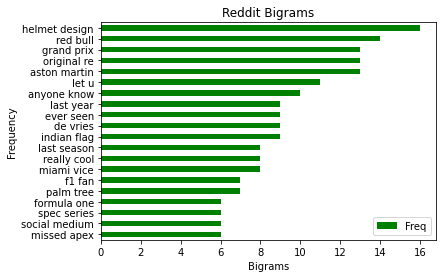

In [67]:
##Plotting bigrams using bar graph
plt.figure(figsize=(14,16))
df_bigram.sort_values('Freq',inplace=True)
df_bigram.plot(kind='barh',y='Freq',x='Phrases',color='g')
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Reddit Bigrams")

In [50]:
#3tokenizing and generating trigrams
esBigrams = ngrams(tokenized, 3)
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq.most_common(10)
trigram=esBigramFreq.most_common(10)

In [51]:
trigram

[(('helmet', 'design', 'ever'), 4),
 (('direct', 'link', 'video'), 3),
 (('link', 'video', 'hq'), 3),
 (('original', 're', 'photo'), 3),
 (('mick', 'schumachers', 'future'), 3),
 (('side', 'pod', 'merc'), 3),
 (('design', 'ever', 'seen'), 3),
 (('helmet', 'ever', 'seen'), 3),
 (('happy', 'collaboration', 'mercedes'), 3),
 (('rule', 'driver', 'allowed'), 2)]

In [53]:
##Creating dictionary for trigrams
dict_ngram={}
for i in trigram:
    name1=i[0][0]
    name2=i[0][1]
    name3=i[0][2]
    freq=i[1]
    name=name1+' '+name2+' '+name3
    dict_ngram[name]=freq

In [54]:
dict_ngram

{'helmet design ever': 4,
 'direct link video': 3,
 'link video hq': 3,
 'original re photo': 3,
 'mick schumachers future': 3,
 'side pod merc': 3,
 'design ever seen': 3,
 'helmet ever seen': 3,
 'happy collaboration mercedes': 3,
 'rule driver allowed': 2}

In [55]:
df_trigram=pd.DataFrame.from_dict(dict_ngram,orient='index')

In [56]:
df_trigram

,0
helmet design ever,4
direct link video,3
link video hq,3
original re photo,3
mick schumachers future,3
side pod merc,3
design ever seen,3
helmet ever seen,3
happy collaboration mercedes,3
rule driver allowed,2


In [57]:
df_trigram.reset_index(inplace=True)

In [58]:
df_trigram

,index,0
0,helmet design ever,4
1,direct link video,3
2,link video hq,3
3,original re photo,3
4,mick schumachers future,3
5,side pod merc,3
6,design ever seen,3
7,helmet ever seen,3
8,happy collaboration mercedes,3
9,rule driver allowed,2


In [59]:
##Renaming columns 
df_trigram.rename(columns={"index": "Phrases", 0:"Freq"},inplace=True)

In [60]:
df_trigram.columns

Index(['Phrases', 'Freq'], dtype='object')

Text(0.5, 1.0, 'Reddit Trigrams')

<Figure size 1008x1152 with 0 Axes>

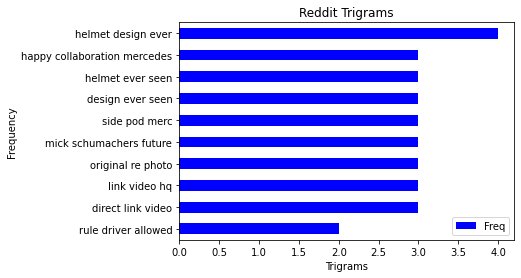

In [68]:
##Plotting trigrams using bar graph
plt.figure(figsize=(14,16))
df_trigram.sort_values('Freq',inplace=True)
df_trigram.plot(kind='barh',y='Freq',x='Phrases',color='blue')
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Reddit Trigrams")

## YAKE

In [57]:
##Installing yake model libraries
pip install git+https://github.com/LIAAD/yake

  Cloning https://github.com/LIAAD/yake to c:\users\bhagy\appdata\local\temp\pip-req-build-qf2ecdxx
  Resolved https://github.com/LIAAD/yake to commit 238ae58c5ba39326a96862ee0e9cb817e5958440
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'



  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake 'C:\Users\bhagy\AppData\Local\Temp\pip-req-build-qf2ecdxx'


In [30]:
##Importing libraries
import yake
import pandas as pd
import re
from cleantext import clean

In [31]:
import yake
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(final_string)
keywords_sort=sorted(keywords,key=lambda x: x[1],reverse=True)

In [32]:
type(keywords)

list

In [33]:
keywords_sort

[('miami helmet basketball', 4.001184070266171e-05),
 ('thought indian flag', 4.00034994764919e-05),
 ('world formula full', 3.845276221961887e-05),
 ('happy collaboration mercedes', 3.708233974517143e-05),
 ('kind cool helmet', 3.601610226614899e-05),
 ('helmet love lando', 3.575006127902042e-05),
 ('love lando helmet', 3.575006127902042e-05),
 ('racing helmet design', 3.552787912700982e-05),
 ('mick schumachers future', 3.439455612963848e-05),
 ('great helmet design', 3.384854790991647e-05),
 ('helmet helmet weekend', 3.298092871500331e-05),
 ('cool helmet good', 3.275241389829258e-05),
 ('miami grand prix', 3.2743359252313914e-05),
 ('love love helmet', 3.264379941440926e-05),
 ('helmet design time', 3.010195436966762e-05),
 ('helmet miami helmet', 2.9261347563859698e-05),
 ('love helmet helmet', 2.8198184782229723e-05),
 ('miami flag bottas', 2.7318308165673354e-05),
 ('kind cool kind', 2.364253267779779e-05),
 ('helmet design miami', 1.5829891285085457e-05)]

In [34]:
##Converting list to dataframe
dataframe=pd.DataFrame(keywords_sort)

In [35]:
dataframe.columns=["Phrases","Significance Value"]

In [36]:
df_sorted_desc= dataframe.sort_values('Significance Value',ascending=False)

In [37]:
df_sorted_desc

,Phrases,Significance Value
0,miami helmet basketball,0.000040
1,thought indian flag,0.000040
2,world formula full,0.000038
3,happy collaboration mercedes,0.000037
4,kind cool helmet,0.000036
5,helmet love lando,0.000036
6,love lando helmet,0.000036
7,racing helmet design,0.000036
8,mick schumachers future,0.000034
9,great helmet design,0.000034


Text(0.5, 1.0, 'Reddit Nigrams using Yake model')

<Figure size 1008x1152 with 0 Axes>

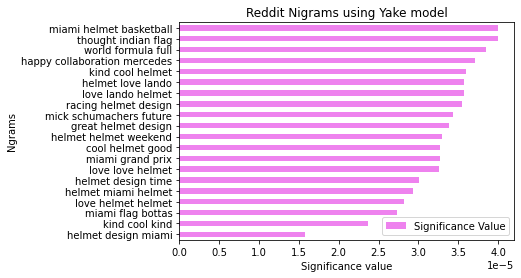

In [66]:
##Plotting yake model results
import matplotlib.pyplot as plt
plt.figure(figsize=(14,16))
df_sorted_desc.sort_values('Significance Value',inplace=True)
df_sorted_desc.plot(kind='barh',y='Significance Value',x='Phrases',color='violet')
plt.xlabel("Significance value")
plt.ylabel("Ngrams")
plt.title("Reddit Nigrams using Yake model")